# Quizz 3 - Exercício Prático

Para se acelerar a correção do quizz, é necessário o preenchimento da seguinte informação:

```{python}

_student_id = {
    'number' : 'a243413'
    , 'lusofona_email' : 'a243413@alunos.lusofona.pt'
    , 'class' : '1'
}

```

O campo `class` deve ser preenchido tendo em conta a seguinte informação:

- a turma das 10-12 deve preencher o campo com o valor `1`
- a turma das 12-14 deve preencher o campo com o valor `2`
- a turma das 18-20 deve preencher o campo com o valor `3`




In [54]:
_student_id = {
    'number' : '21703349'
    , 'lusofona_email' : 'a21703349@alunos.ulht.pt'
    , 'class' : '1'
}

## Exercícios 

Este quizz vai ser feito utilizando um dataset de incêndios florestais, que está já a ser carregado para um dataframe de `pandas` na célula abaixo.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
forest_fires = pd.read_csv("https://raw.githubusercontent.com/tiago-santos-ulus/sim_2019/master/data/forestfires_preprocessed.csv")

## 1 Verificar se existem linhas repetidas

Neste exercício tens que verificar se existem linhas repetidas.
Deves verificar isso utilizando uma função adequada da biblioteca `pandas`.

Caso hajam repetidos, devemos manter no dataframe `forest_fires` os primeiros elementos e apagar os que aparecem depois duplicados.

In [41]:
### A tua resposta deve ser desenvolvida aqui

In [42]:
len(forest_fires)

569

In [43]:
forest_fires.drop_duplicates(subset = None ,inplace=True)

In [44]:
len(forest_fires)

569

## 2 Mostra os Histogramas de todas as variáveis do dataframe

Neste exercício tens que conseguir mostrar o histograma de todas as variáveis do dataframe.
O código deve estar de maneira a que, caso sejam adicionadas mais colunas, o histograma destas novas colunas serão também mostrados.

In [45]:
forest_fires.columns

Index(['Unnamed: 0', 'index', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp',
       'RH', 'wind', 'rain', 'area', 'Z'],
      dtype='object')

In [46]:
forest_fires = forest_fires.drop(columns = "Unnamed: 0")

C:\Users\mitra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


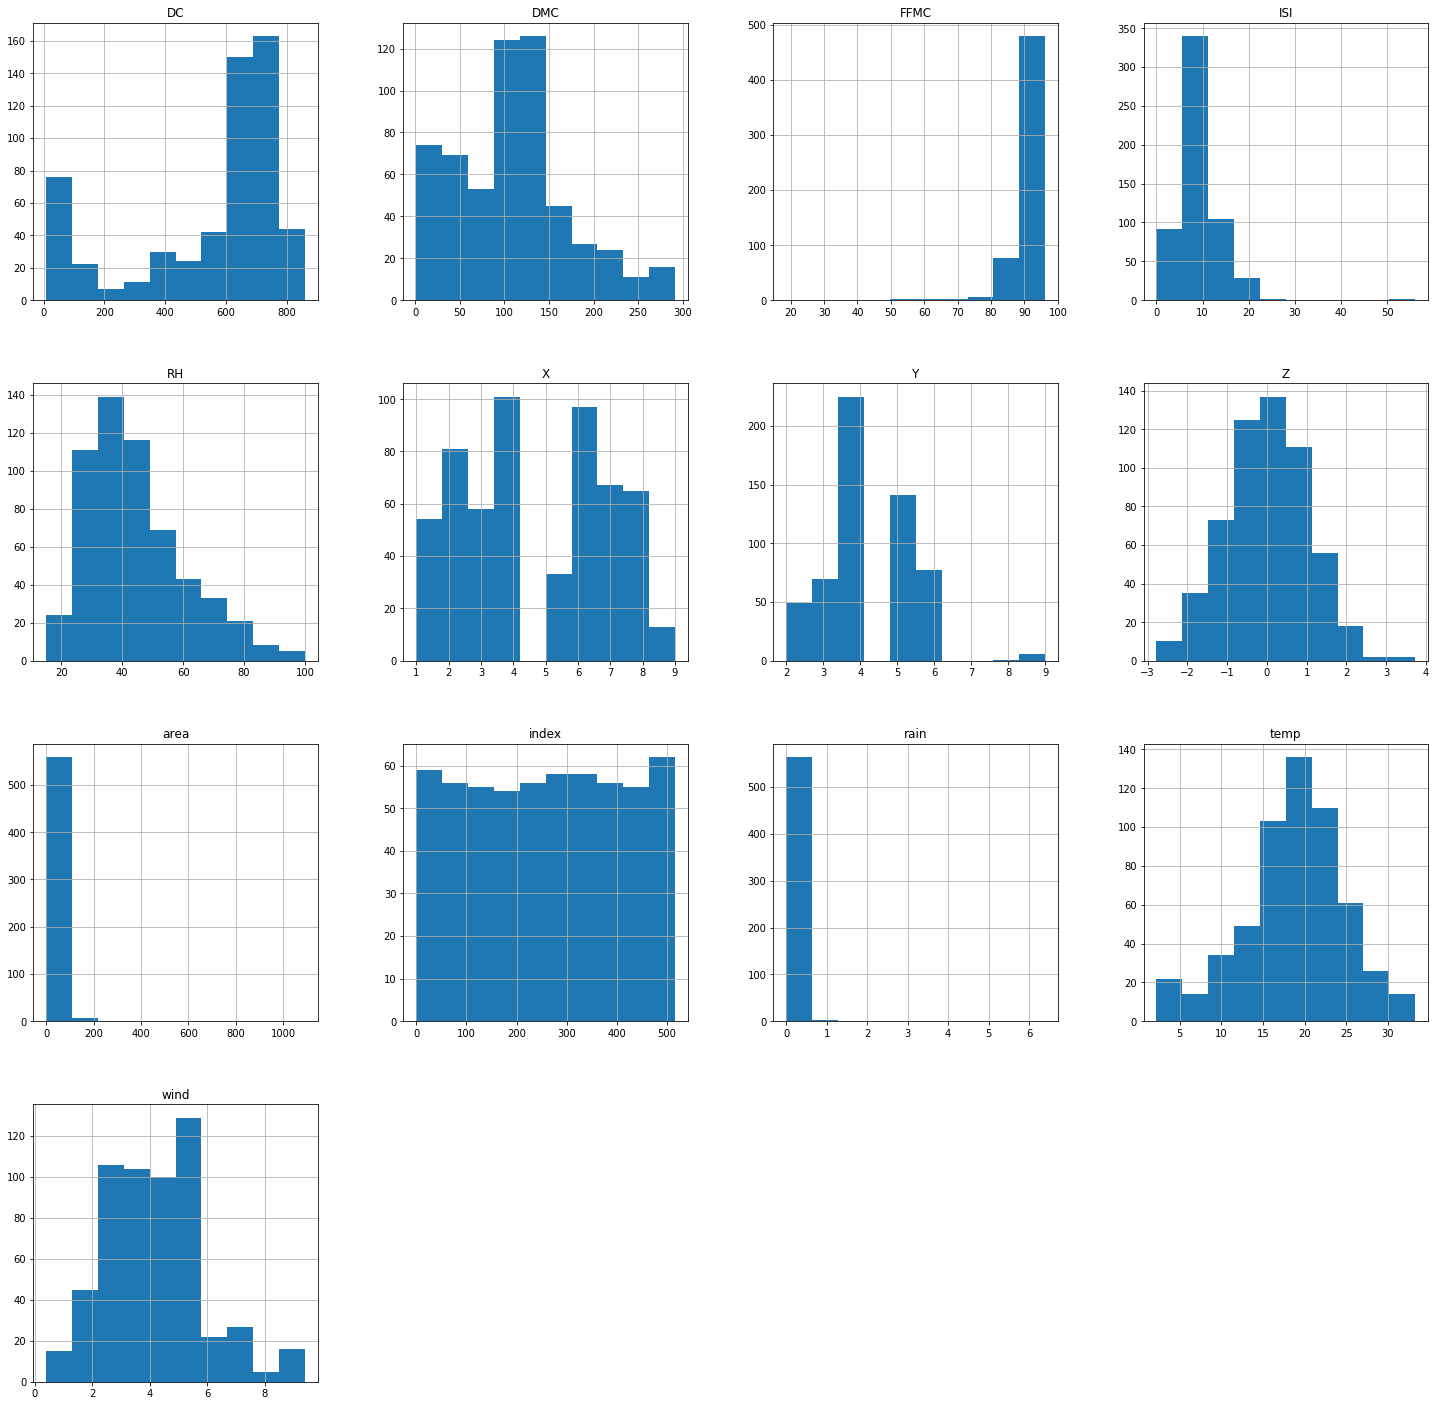

In [51]:
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
forest_fires.hist(ax=ax)
plt.show()

## 3 Aplica o PCA

Neste exercício, deverás aplicar o PCA da maneira mais apropriada.
Se souberes o que é que o PCA faz, vais também saber que tipo de pré-processamento precisas de dar aos dados :)

Deverás:
- Usar todas as componentes principais 
- imprimir o atributo `explained_variance_ratio_`
- imprimir a soma cumulativa do vetor `explained_variance_ratio_`

In [52]:
X = forest_fires.iloc[:, :-1].values
print(X)

[[  0.     7.     5.   ...   6.7    0.     0.  ]
 [  1.     7.     4.   ...   0.9    0.     0.  ]
 [  2.     7.     4.   ...   1.3    0.     0.  ]
 ...
 [ 22.     7.     4.   ...   4.5    0.     0.  ]
 [126.     3.     5.   ...   2.2    0.     0.  ]
 [279.     4.     4.   ...   8.5    0.     9.77]]


In [53]:
x = StandardScaler().fit_transform(X)

pca_non_norm = PCA(n_components=forest_fires.shape[1]-1)

pca_non_norm.fit(forest_fires.values[:,:-1])
pca_non_norm.explained_variance_ratio_

array([6.96624310e-01, 2.40463154e-01, 4.00462243e-02, 1.92574006e-02,
       2.89366978e-03, 3.38643286e-04, 1.58855641e-04, 1.17202139e-04,
       6.05069989e-05, 2.91346082e-05, 1.00809685e-05, 8.17412805e-07])

In [50]:
sum(pca_non_norm.explained_variance_ratio_)

1.0

## 4 Calcula a matrix de correlação do dataframe

Neste exercício, vais obter a matrix de correlação do dataframe inicial `forest_fires`.
O código deve estar de maneira a que, caso sejam adicionadas mais colunas, o histograma destas novas colunas serão também mostrados.

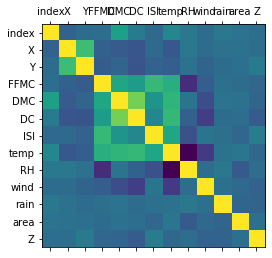

In [59]:
plt.matshow(forest_fires.corr())
plt.yticks(range(forest_fires.shape[1]), forest_fires.columns, fontsize=10)
plt.xticks(range(forest_fires.shape[1]), forest_fires.columns, fontsize=10)
plt.show()

## 5 Calcular o p-value do teste de Jarques-Bera para todas as colunas.

Neste exercício, vais obter a matrix de correlação do dataframe inicial `forest_fires`. O código deve estar de maneira a que, caso sejam adicionadas mais colunas, o histograma destas novas colunas serão também mostrados.

In [33]:
for col in forest_fires.columns:
    print( stats.jarque_bera(forest_fires[col]))

(34.20797771772523, 3.7310581735283677e-08)
(32.53829120213626, 8.598047507302198e-08)
(59.93423155692326, 9.670042544485113e-14)
(114359.13499045692, 0.0)
(27.587446309854258, 1.0220264816673819e-06)
(111.40356463188265, 0.0)
(19052.466373220203, 0.0)
(11.837853926409094, 0.002688083041980316)
(76.38042250879546, 0.0)
(29.106073153313645, 4.782957477855732e-07)
(5049073.373239142, 0.0)
(1001620.544634587, 0.0)
(1.4356518493832096, 0.48781164319750236)


# Zona auxiliar para as perguntas do Moodle

In [62]:
stats.jarque_bera(forest_fires["Z"])

(1.4356518493832096, 0.48781164319750236)

In [63]:
forest_fires["DC"].corr(forest_fires["area"])

0.0450194000699573

In [65]:
answer = round(forest_fires["DC"].corr(forest_fires["area"]), 2)
print(answer)

0.05
